UNAD

Cesar Lozano Gomez Predecir el precio del automóvil en función de sus atributos con Regresión Lineal. 

Pasos de la Actividad

1.Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
2.Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.
3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.
4.Dividir el dataset en Train y Test para evaluar correctamente el modelo.
5.Entrenar el modelo configurando los diferentes hiperparámetros.
6.Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.
7.Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
8.Interpretar, analizar y documentar los resultados obtenidos.

In [9]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



In [10]:
# lectura de datos en Python y lo cargamos en la variable Datos
data = pd.read_csv('D:/DatosTarea3/Regresion_Lineal/CAR DETAILS FROM CAR DEKHO.csv')


In [11]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [23]:
print(data.isnull().sum())

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64


In [31]:
data_encoded = pd.get_dummies(data, drop_first=True)

In [33]:
# Verificar los modelos más comunes
top_models = data['name'].value_counts().nlargest(10).index.tolist()

# Agrupar los modelos menos frecuentes como 'Otros'
data['name_grouped'] = data['name'].apply(lambda x: x if x in top_models else 'Otros')

# Ahora puedes aplicar One Hot Encoding a 'name_grouped' y otras categóricas
data_clean = data.drop(columns=['name'])  # solo quitamos la original
data_encoded = pd.get_dummies(data_clean, columns=['name_grouped', 'fuel', 'seller_type', 'transmission', 'owner'], drop_first=True)

data_encoded.head()


,year,selling_price,km_driven,name_grouped_Hyundai EON Magna Plus,name_grouped_Maruti Alto 800 LXI,name_grouped_Maruti Alto LX,name_grouped_Maruti Alto LXi,name_grouped_Maruti Swift Dzire VDI,name_grouped_Maruti Swift VDI,name_grouped_Maruti Swift VDI BSIV,...,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2007,60000,70000,False,False,False,False,False,False,False,...,False,False,True,True,False,True,False,False,False,False
1,2007,135000,50000,False,False,False,False,False,False,False,...,False,False,True,True,False,True,False,False,False,False
2,2012,600000,100000,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
3,2017,250000,46000,False,False,False,False,False,False,False,...,False,False,True,True,False,True,False,False,False,False
4,2014,450000,141000,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,True,False,False


In [55]:
# Separar características (X) y variable objetivo (y)
X = data_encoded.drop(columns=['selling_price'])
y = data_encoded['selling_price']

# División en conjuntos de entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [59]:
# Predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular métricas
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

MAE: 218793.20
RMSE: 425385.52
R²: 0.4070


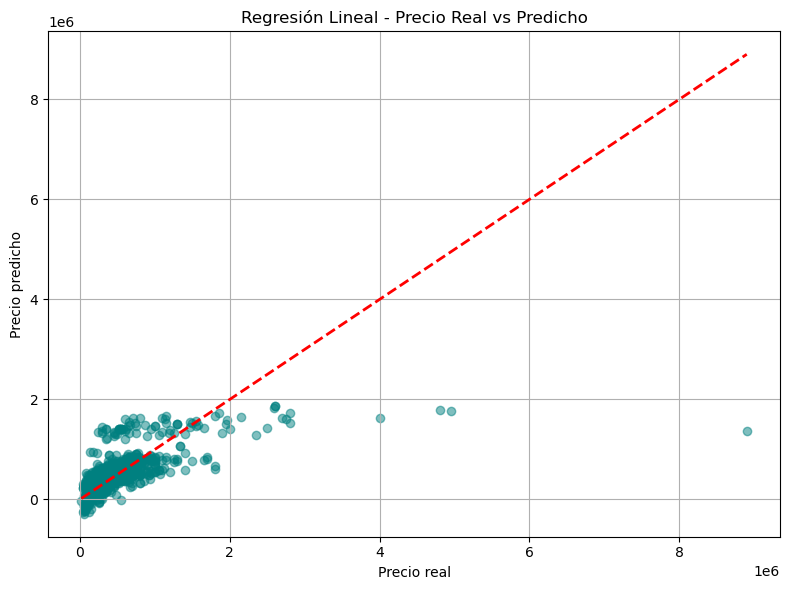

In [61]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Precio real")
plt.ylabel("Precio predicho")
plt.title("Regresión Lineal - Precio Real vs Predicho")
plt.grid(True)
plt.tight_layout()
plt.show()

El modelo de regresión lineal aplicado para predecir el precio de vehículos usados, basado en atributos como el año de fabricación, kilometraje, tipo de combustible, tipo de vendedor, transmisión, historial de propiedad y modelo del vehículo, arrojó los siguientes resultados de desempeño:

MAE (Error Absoluto Medio): 218,793.20

RMSE (Raíz del Error Cuadrático Medio): 425,385.52

R² (Coeficiente de determinación): 0.4070

Estos valores indican que, en promedio, el modelo comete un error de aproximadamente $218,793 al predecir el precio, y que puede explicar el 40.7% de la variabilidad del precio de los automóviles en función de las variables independientes consideradas. Aunque el modelo logra capturar parte de la relación entre las características del vehículo y su precio de venta, aún existe una proporción considerable de variabilidad que no está siendo explicada.

Esto puede deberse a factores externos no incluidos en el dataset, como el estado físico del vehículo, ubicación geográfica, o demanda en el mercado. No obstante, el modelo constituye una base sólida para continuar explorando algoritmos más avanzados y técnicas de ajuste que permitan mejorar la precisión de las predicciones.